In [77]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import fun_datacleaning as fnd

In [82]:
def clean_dataframe(archivo):

    data = pd.read_csv(archivo)
    df = pd.DataFrame(data)
    df = df[['date','retweets','favorites','content']]
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df2016 = df[df["year"]>2015]
    df2016["date2"]= pd.to_datetime(df['date']).dt.date
    df2016['Time'] = pd.to_datetime(df['date']).dt.time
    df2016.reset_index()
    dfcount = df2016['date2'].value_counts().reset_index(name = "tweet_count")
    dfcount.reset_index()
    dfcount['index'] = pd.to_datetime(dfcount['index'])

    return dfcount
    
    

In [ ]:
data = pd.read_csv("trumptweets.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags', 'geo'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


In [7]:
df = df[['date','retweets','favorites','content']]

In [8]:
df.head()

,date,retweets,favorites,content
0,2009-05-04 20:54:25,500,868,Be sure to tune in and watch Donald Trump on L...
1,2009-05-05 03:00:10,33,273,Donald Trump will be appearing on The View tom...
2,2009-05-08 15:38:08,12,18,Donald Trump reads Top Ten Financial Tips on L...
3,2009-05-08 22:40:15,11,24,New Blog Post: Celebrity Apprentice Finale and...
4,2009-05-12 16:07:28,1399,1965,"""My persona will never be that of a wallflower..."


In [9]:
df["favorites"].max()

857678

In [10]:
df["favorites"].mean().round()

22357.0

In [11]:
df["retweets"].max()

309892

In [12]:
df["retweets"].mean().round()

5456.0

In [13]:
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [15]:
df.head()

,date,retweets,favorites,content,year,month,day
0,2009-05-04 20:54:25,500,868,Be sure to tune in and watch Donald Trump on L...,2009,5,4
1,2009-05-05 03:00:10,33,273,Donald Trump will be appearing on The View tom...,2009,5,5
2,2009-05-08 15:38:08,12,18,Donald Trump reads Top Ten Financial Tips on L...,2009,5,8
3,2009-05-08 22:40:15,11,24,New Blog Post: Celebrity Apprentice Finale and...,2009,5,8
4,2009-05-12 16:07:28,1399,1965,"""My persona will never be that of a wallflower...",2009,5,12


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       41122 non-null  datetime64[ns]
 1   retweets   41122 non-null  int64         
 2   favorites  41122 non-null  int64         
 3   content    41122 non-null  object        
 4   year       41122 non-null  int64         
 5   month      41122 non-null  int64         
 6   day        41122 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.2+ MB


In [17]:
df2016 = df[df["year"]>2015]

In [18]:
df2016.head()

,date,retweets,favorites,content,year,month,day
27172,2016-01-01 00:11:35,2379,5904,"Do you believe that The State Department, on N...",2016,1,1
27173,2016-01-01 00:21:49,5969,14936,I would like to wish everyone A HAPPY AND HEAL...,2016,1,1
27174,2016-01-01 01:44:14,1776,5742,"I will be on @ FoxNews live, with members of m...",2016,1,1
27175,2016-01-01 04:25:27,2887,7363,HAPPY NEW YEAR & THANK YOU! https://www.facebo...,2016,1,1
27176,2016-01-01 06:18:23,2882,7839,# HappyNewYearAmerica!pic.twitter.com/EeQb8PDrUe,2016,1,1


In [19]:
df2016["date2"]= pd.to_datetime(df['date']).dt.date
df2016['Time'] = pd.to_datetime(df['date']).dt.time

<ipython-input-19-f50694c820d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016["date2"]= pd.to_datetime(df['date']).dt.date
<ipython-input-19-f50694c820d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2016['Time'] = pd.to_datetime(df['date']).dt.time


In [20]:
df2016.head()

,date,retweets,favorites,content,year,month,day,date2,Time
27172,2016-01-01 00:11:35,2379,5904,"Do you believe that The State Department, on N...",2016,1,1,2016-01-01,00:11:35
27173,2016-01-01 00:21:49,5969,14936,I would like to wish everyone A HAPPY AND HEAL...,2016,1,1,2016-01-01,00:21:49
27174,2016-01-01 01:44:14,1776,5742,"I will be on @ FoxNews live, with members of m...",2016,1,1,2016-01-01,01:44:14
27175,2016-01-01 04:25:27,2887,7363,HAPPY NEW YEAR & THANK YOU! https://www.facebo...,2016,1,1,2016-01-01,04:25:27
27176,2016-01-01 06:18:23,2882,7839,# HappyNewYearAmerica!pic.twitter.com/EeQb8PDrUe,2016,1,1,2016-01-01,06:18:23


In [21]:
df2016.reset_index()

,index,date,retweets,favorites,content,year,month,day,date2,Time
0,27172,2016-01-01 00:11:35,2379,5904,"Do you believe that The State Department, on N...",2016,1,1,2016-01-01,00:11:35
1,27173,2016-01-01 00:21:49,5969,14936,I would like to wish everyone A HAPPY AND HEAL...,2016,1,1,2016-01-01,00:21:49
2,27174,2016-01-01 01:44:14,1776,5742,"I will be on @ FoxNews live, with members of m...",2016,1,1,2016-01-01,01:44:14
3,27175,2016-01-01 04:25:27,2887,7363,HAPPY NEW YEAR & THANK YOU! https://www.facebo...,2016,1,1,2016-01-01,04:25:27
4,27176,2016-01-01 06:18:23,2882,7839,# HappyNewYearAmerica!pic.twitter.com/EeQb8PDrUe,2016,1,1,2016-01-01,06:18:23
...,...,...,...,...,...,...,...,...,...,...
13945,41117,2020-01-19 19:24:52,32620,213817,I have never seen the Republican Party as Stro...,2020,1,19,2020-01-19,19:24:52
13946,41118,2020-01-19 22:12:20,36239,149571,Now Mini Mike Bloomberg is critical of Jack Wi...,2020,1,19,2020-01-19,22:12:20
13947,41119,2020-01-20 01:27:07,16588,66944,I was thrilled to be back in the Great State o...,2020,1,20,2020-01-20,01:27:07
13948,41120,2020-01-20 02:16:00,20599,81921,"“In the House, the President got less due proc...",2020,1,20,2020-01-20,02:16:00


In [22]:
dfcount = df2016['date2'].value_counts().reset_index(name = "tweet_count")

In [23]:
len(dfcount["tweet_count"])

1466

In [24]:
dfcount.head(40)

,index,tweet_count
0,2016-10-20,78
1,2016-05-18,47
2,2016-10-05,46
3,2016-09-27,43
4,2016-10-10,42
5,2019-10-09,35
6,2019-10-05,35
7,2019-11-17,34
8,2019-09-30,34
9,2016-01-28,33


In [25]:
dfcount.reset_index()

,level_0,index,tweet_count
0,0,2016-10-20,78
1,1,2016-05-18,47
2,2,2016-10-05,46
3,3,2016-09-27,43
4,4,2016-10-10,42
...,...,...,...
1461,1461,2016-03-21,1
1462,1462,2017-02-28,1
1463,1463,2017-02-19,1
1464,1464,2016-12-29,1


In [26]:
dfcount['index'] = pd.to_datetime(dfcount['index'])

In [27]:
dfcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        1466 non-null   datetime64[ns]
 1   tweet_count  1466 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 23.0 KB


In [84]:
def unir_tablas():
    
    data_nasdaq = pd.read_csv("nasdaq_clean.csv")

    df_nasdaq = pd.DataFrame(data_nasdaq)
    df_nasdaq['Date'] = pd.to_datetime(df_nasdaq['Date'])
    dfcount = clean_dataframe("trumptweets.csv")
    
    df_resultado = dfcount.merge(df_nasdaq, left_on="index", right_on="Date")
    df_resultado["tweets"] = df_resultado["tweet_count"].apply(tweets_count)
    
    return df_resultado

## SEGUNDA FUNCION 


In [28]:
data_nasdaq = pd.read_csv("nasdaq_clean.csv")

In [29]:
df_nasdaq = pd.DataFrame(data_nasdaq)

In [30]:
df_nasdaq.head()

,Date,Open,Close,crecimiento,%
0,2016-02-01,4587.589844,4620.370117,32.780273,0.709473
1,2016-02-02,4588.689941,4516.950195,-71.739746,-1.588234
2,2016-02-03,4543.819824,4504.240234,-39.579590,-0.878718
3,2016-02-04,4492.479980,4509.560059,17.080079,0.378753
4,2016-02-05,4491.479980,4363.140137,-128.339843,-2.941456


In [31]:
df_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1259 non-null   object 
 1   Open         1259 non-null   float64
 2   Close        1259 non-null   float64
 3   crecimiento  1259 non-null   float64
 4   %            1259 non-null   float64
dtypes: float64(4), object(1)
memory usage: 49.3+ KB


In [32]:
df_nasdaq['Date'] = pd.to_datetime(df_nasdaq['Date'])

In [33]:
df_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1259 non-null   datetime64[ns]
 1   Open         1259 non-null   float64       
 2   Close        1259 non-null   float64       
 3   crecimiento  1259 non-null   float64       
 4   %            1259 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 49.3 KB


### MERGE 


In [34]:
df_resultado = dfcount.merge(df_nasdaq, left_on="index", right_on="Date")

In [35]:
df_resultado.head(30)

,index,tweet_count,Date,Open,Close,crecimiento,%
0,2016-10-20,78,2016-10-20,5238.200195,5241.830078,3.629883,0.069248
1,2016-05-18,47,2016-05-18,4705.779785,4739.120117,33.340332,0.703513
2,2016-10-05,46,2016-10-05,5305.279785,5316.020020,10.740235,0.202035
3,2016-09-27,43,2016-09-27,5254.180176,5305.709961,51.529785,0.971214
4,2016-10-10,42,2016-10-10,5318.459961,5328.669922,10.209961,0.191604
5,2019-10-09,35,2019-10-09,7895.959961,7903.740234,7.780273,0.098438
6,2019-09-30,34,2019-09-30,7964.089844,7999.339844,35.250000,0.440661
7,2016-03-16,32,2016-03-16,4717.879883,4763.970215,46.090332,0.967477
8,2019-10-14,32,2019-10-14,8044.350098,8048.649902,4.299804,0.053423
9,2016-02-25,29,2016-02-25,4554.729980,4582.200195,27.470215,0.599498


In [36]:

def tweets_count(x):
    if x > 34: 
        return "Más de 35"
    elif x < 6:
        return "Menos de 6"
    else:
        return "Resto"
    

In [37]:
df_resultado["tweets"] = df_resultado["tweet_count"].apply(fnd.tweets_count)

In [38]:
df_resultado.head()

,index,tweet_count,Date,Open,Close,crecimiento,%,tweets
0,2016-10-20,78,2016-10-20,5238.200195,5241.830078,3.629883,0.069248,Más de 35
1,2016-05-18,47,2016-05-18,4705.779785,4739.120117,33.340332,0.703513,Más de 35
2,2016-10-05,46,2016-10-05,5305.279785,5316.020020,10.740235,0.202035,Más de 35
3,2016-09-27,43,2016-09-27,5254.180176,5305.709961,51.529785,0.971214,Más de 35
4,2016-10-10,42,2016-10-10,5318.459961,5328.669922,10.209961,0.191604,Más de 35


<AxesSubplot:xlabel='tweets', ylabel='%'>

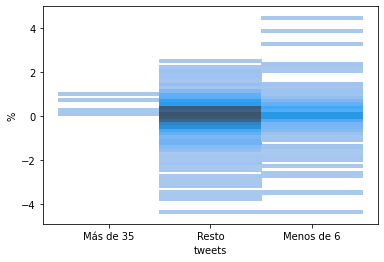

In [40]:
sns.histplot(data=df_resultado,
    x="tweets", y="%")


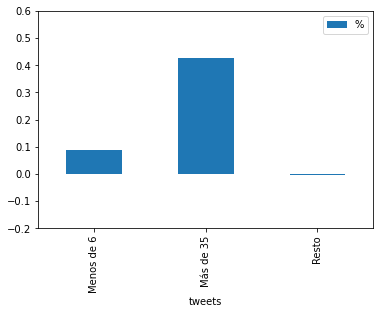

In [55]:
df_resultado.groupby("tweets").agg({
    "%":"mean"}).plot.bar(ylim=(-0.2,0.60));


In [56]:
df_resultado.groupby("tweets").agg({
    "%":"mean"})

,%
tweets,
Menos de 6,0.089205
Más de 35,0.427523
Resto,-0.003120


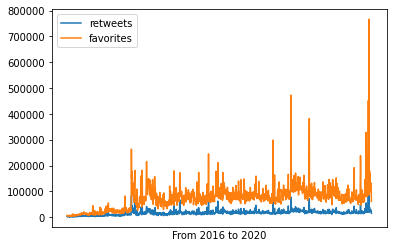

In [74]:
df2016.groupby("date2").agg({
    "retweets":"mean",
    "favorites":"mean"
}).plot.line()
plt.xticks([])
plt.xlabel('From 2016 to 2020');